<a href="https://colab.research.google.com/github/shaem/pca-kmeans/blob/main/pca___kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/MyDrive/Student 6.xlsx'

df_student = pd.read_excel(path) 

# remove unrequired column
df_student.drop('ID', axis=1, inplace=True)
df_student.head()

,UNIVERSITI,UMUR_DAFTAR,KELAYAKAN,BIDANG_PENGAJIAN,TAJAAN,CGPA,KEPUTUSAN_LI,BIL_AKTIVITI,STATUS_PEKERJAAN,STATUS_PENGAJIAN
0,3,2,2,2,3,1,0,0,2,0
1,3,3,3,2,3,2,0,0,2,0
2,3,2,2,5,3,1,0,0,2,0
3,3,3,3,2,3,1,0,0,2,0
4,3,3,3,2,3,2,0,0,2,0


In [ ]:
### Get all the features columns except the class
features = list(df_student.columns)[:]

### Get the features data
data = df_student[features]

In [ ]:
clustering_kmeans = KMeans(n_clusters=4, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

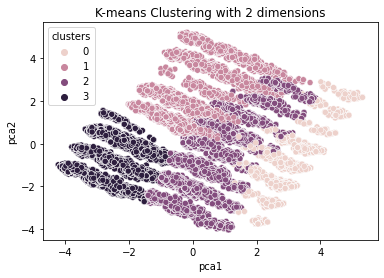

In [ ]:
import seaborn as sns
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(data)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=data['clusters'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):
    model2 = KMeans(n_clusters=k, random_state=42)
    model2.fit(data)
    score = silhouette_score(data, model2.labels_)
    print("Silhouette Score for k = ", k, "is", score)
    silhouette_scores.append(score)

Silhouette Score for k =  2 is 0.22569685991635974
Silhouette Score for k =  3 is 0.23620149995982467
Silhouette Score for k =  4 is 0.2623599027025386
Silhouette Score for k =  5 is 0.24222544949844865
Silhouette Score for k =  6 is 0.23712942617695984
Silhouette Score for k =  7 is 0.21782214235234215
Silhouette Score for k =  8 is 0.2161834793713874
Silhouette Score for k =  9 is 0.19654187175907858
Silhouette Score for k =  10 is 0.19657712270277786


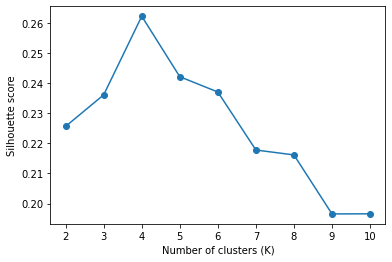

In [ ]:
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette score')
plt.savefig('silhouette plot.png')